In [1]:
import pandas as pd
import sys, os, pathlib
sys.path.append(str(pathlib.Path(os.getcwd()).parent))
sys.path
from src.utils.projekt_utils import get_project_root
from src.utils.name_utils import US_STATES_DIR
FIPS = 'FIPS code'


## Aggregate data from multiple csv into one dataframe

In [2]:
df1 = pd.read_csv(os.path.join(get_project_root(), "data/processed/education_data.csv"), sep=';')

In [3]:
 # education 
edu = df1['State'].to_frame(name='State')
edu['Higher Education'] =  df1.iloc[:,-2:].sum(axis=1)
edu[FIPS] = df1[FIPS]
# edu["State"] = df1['State']
edu = edu.set_index(FIPS)

In [31]:
df1.iloc[:,-2:]

,"Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21"
0,28.694401,28.131469
1,31.188379,32.450286
2,27.841067,11.153098
3,24.705736,11.913807
4,33.621029,14.903610
...,...,...
3149,40.710383,19.391717
3150,21.263945,57.868509
3151,39.189904,17.955112
3152,42.282869,26.166329


In [5]:
edu

,State,Higher Education
FIPS code,,
1001,Alabama,56.825870
1003,Alabama,63.638665
1005,Alabama,38.994165
1007,Alabama,36.619543
1009,Alabama,48.524639
...,...,...
56037,Wyoming,60.102100
56039,Wyoming,79.132454
56041,Wyoming,57.145016


In [6]:
df2 = pd.read_csv(os.path.join(get_project_root(), "data/processed/GDP_data.csv"), sep=';')


In [7]:
gdp = df2[[FIPS,'2016 Real GDP (thousands of chained 2012 dollars) ']]
gdp = gdp.set_index(FIPS)

In [8]:
df3 = pd.read_csv(os.path.join(get_project_root(), "data/processed/HPI_data.csv"), sep=';')

In [9]:
hpi = df3[[FIPS, '2016 HPI Change']]
hpi = hpi.set_index(FIPS)

In [10]:
df4 = pd.read_csv(os.path.join(get_project_root(), "data/processed/income_data.csv"), sep=';')

In [11]:
income = df4[[FIPS, '2016 Population (persons) 1/']]
income = income.set_index(FIPS)
income = income.rename(columns={'2016 Population (persons) 1/':'2016 Income'})


In [12]:
df5 = pd.read_csv(os.path.join(get_project_root(), "data/processed/unemployment_data.csv"), sep=';')

In [13]:
unempl = df5[[FIPS, 'Unemployment_rate_2016']]
unempl = unempl.set_index(FIPS)

In [14]:
df6 = pd.read_csv(os.path.join(get_project_root(), "data/processed/health_data.csv"), sep=';')

In [15]:
df6_cols = [FIPS, 'Poor physical health days raw value 2016', 'Poor mental health days raw value 2016', 'Violent crime raw value 2016', 'Severe housing problems raw value 2016', 'Income inequality raw value 2016', 'Access to exercise opportunities raw value 2016']
health = df6[df6_cols]
health = health.set_index(FIPS)

In [16]:
import re
core_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/MigrationData.csv'), encoding='latin-1',
                            sep=';',skipinitialspace = True)

names = ['StateA', 'CountyA','StateB', 'CountyB']
for name in names:
    core_data[name] = core_data[name].map(str.strip)
    
us_data = core_data[core_data['StateA'].isin(US_STATES_DIR.values()) & core_data['StateB'].isin(US_STATES_DIR.values())]

fipsA = us_data['index'].map(lambda x : re.compile(r'[1-9][0-9]{3}[1-9]?').search(x[1:7]))
fipsA = fipsA.dropna().map(lambda x: int(x.group(0)))

In [17]:
fipsA

0          1001
1          1001
2          1001
3          1001
4          1001
          ...  
411710    56045
411711    56045
411712    56045
411713    56045
411714    56045
Name: index, Length: 398252, dtype: int64

In [18]:
common_fips = set(df1['FIPS code']) \
    & set(df2['FIPS code']) \
    & set(df3['FIPS code']) \
    & set(df4['FIPS code']) \
    & set(df5['FIPS code']) \
    & set(df6['FIPS code']) \
    & set(fipsA)


In [19]:
len(common_fips)


2703

In [20]:
df = edu\
    .join(hpi, how='inner')\
    .join(income,how='inner' )\
    .join(unempl, how='inner')\
    .join(health, how='inner')\
    # .join(gdp, how='inner')

In [21]:
df

,State,Higher Education,2016 HPI Change,2016 Income,Unemployment_rate_2016,Poor physical health days raw value 2016,Poor mental health days raw value 2016,Violent crime raw value 2016,Severe housing problems raw value 2016,Income inequality raw value 2016,Access to exercise opportunities raw value 2016
FIPS code,,,,,,,,,,,
1001.0,Alabama,56.825870,2.64,56954,5.1,4.4,4.3,253.644617,0.136193,4.303481,0.708215
1003.0,Alabama,63.638665,5.20,210004,5.4,4.1,4.2,220.665106,0.147079,4.494800,0.721685
1005.0,Alabama,38.994165,-0.68,26217,8.4,4.9,4.7,146.888576,0.175597,5.285567,0.452671
1007.0,Alabama,36.619543,3.95,22654,6.5,4.8,4.6,235.952110,0.129993,4.251361,0.328388
1009.0,Alabama,48.524639,1.66,58238,5.4,4.6,4.5,219.034344,0.123395,4.124186,0.255085
...,...,...,...,...,...,...,...,...,...,...,...
56037.0,Wyoming,60.102100,0.64,43979,6.1,3.4,3.2,429.278285,0.095555,4.043361,0.905858
56039.0,Wyoming,79.132454,11.04,23157,3.5,3.0,3.0,299.352183,0.198635,3.812541,0.978351
56041.0,Wyoming,57.145016,5.64,20846,5.8,3.4,3.2,45.362551,0.124828,4.693743,0.145800


In [2]:
import sqlite3
conn = sqlite3.connect('../data/baza_projekt.db')
# counties = pd.read_sql_query('SELECT * FROM unemployment', conn).iloc[:, :3]
counties = pd.read_sql_query(""" 
select e.[FIPS code],
       e.State,
       "Percent of adults completing some college or associate's degree, 2017-21"  + "Percent of adults with a bachelor's degree or higher, 2017-21" as "Higher Education",
       "2016 HPI Change" as HPI,
       "2016 Population (persons) 1/" as Income,
       "Unemployment_rate_2016" as Unemployment,
       "Poor physical health days raw value 2016" as "Poor physical health days",
       "Poor mental health days raw value 2016" as "Poor mental health days",
       "Violent crime raw value 2016" as "Violent crime",
       "Severe housing problems raw value 2016" as "Severe housing problems",
       "Income inequality raw value 2016" as "Income inequality",
       "Access to exercise opportunities raw value 2016" as "Access to exercise opportunities"
from education as e
    inner join hpi as h on h.[FIPS code] = e.[FIPS code]
    inner join income as i on i.[FIPS code] = e.[FIPS code]
    inner join unemployment as u on u.[FIPS code] = e.[FIPS code]
    inner join health as he on he.[FIPS code] = e.[FIPS code]
    """,
    conn
    )
df = counties.set_index(FIPS)

## Correlation Heatmap

<Axes: >

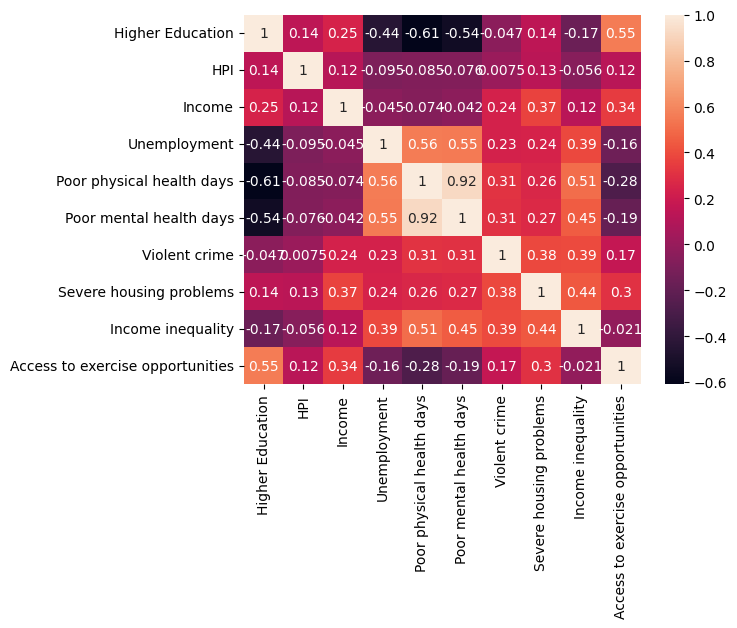

In [3]:
import seaborn as sns
sns.heatmap(df.drop('State',axis=1).corr(), annot=True)

## Features Historgram

array([[<Axes: title={'center': 'Higher Education'}>,
        <Axes: title={'center': 'HPI'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Poor physical health days'}>],
       [<Axes: title={'center': 'Poor mental health days'}>,
        <Axes: title={'center': 'Violent crime'}>,
        <Axes: title={'center': 'Severe housing problems'}>,
        <Axes: title={'center': 'Income inequality'}>,
        <Axes: title={'center': 'Access to exercise opportunities'}>]],
      dtype=object)

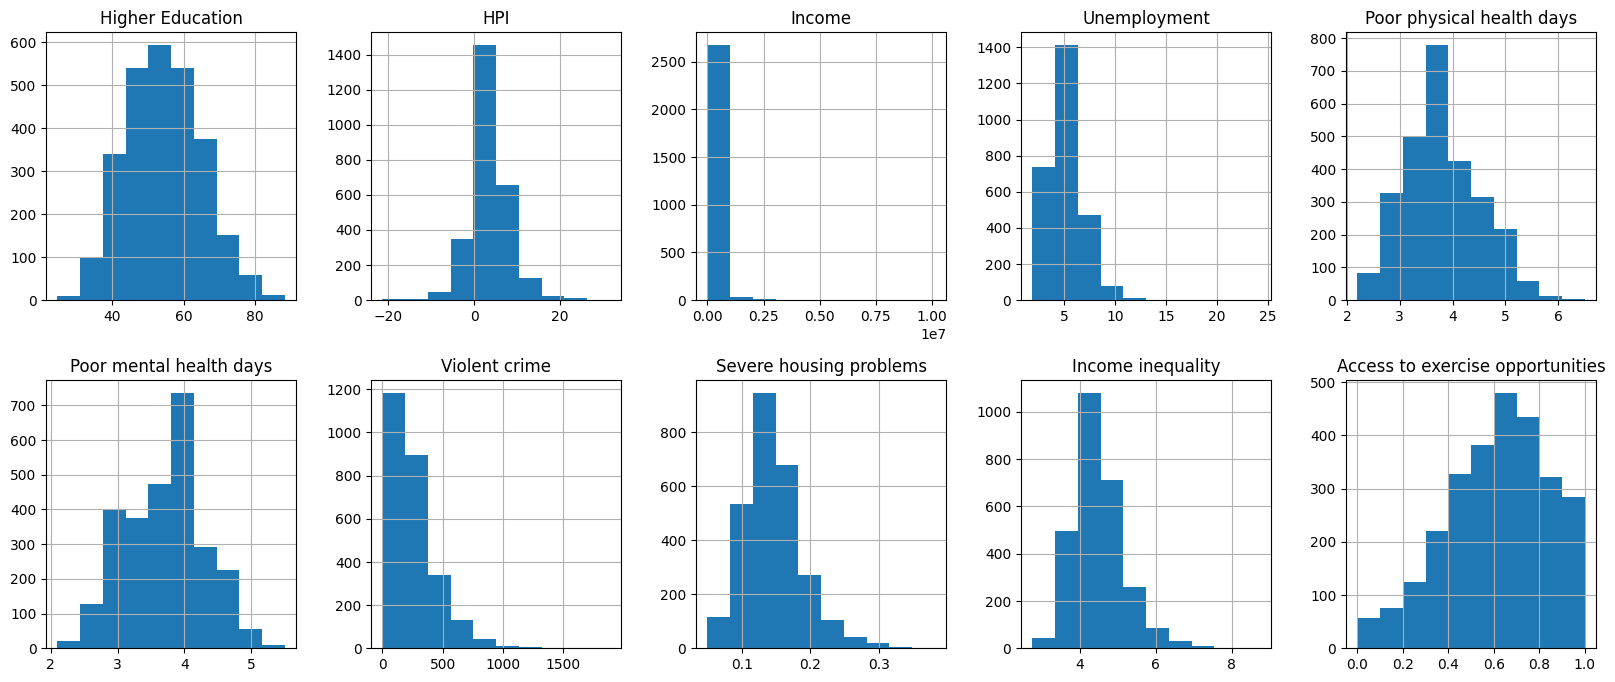

In [4]:
df.drop('State',axis=1).hist(figsize=(20,8), layout=(2,5))

## Finding best distribution and its parameters

In [5]:
# https://stackoverflow.com/questions/37487830/how-to-find-prxobability-distribution-and-parameters-for-real-data-python-3
import scipy.stats as st
def get_best_distribution(data, log=False):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        # if log:
            # print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    if log:
        print("Best fitting distribution: "+str(best_dist))
        print("Best p value: "+ str(best_p))
        print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [39]:
feature_distributions = dict()
for col in df.drop('State',axis=1).columns:
    # print('\n' + col)
    dist, p, params = get_best_distribution(df[col].dropna(), False)
    feature_distributions[col] = (dist, params)

print(feature_distributions)

c:\Users\piotr\Workspaces\USMigrations\.venv\lib\site-packages\scipy\stats\_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


{'Higher Education': ('weibull_min', (2.9197656824000027, 26.480471149110095, 31.404713442807868)), 'HPI': ('norm', (3.5678129657228017, 4.551815324726292)), 'Income': ('pareto', (1.4207286983105127, -54130.14211427061, 54799.1421142706)), 'Unemployment': ('exponweib', (22.779559555593146, 1.243596529465119, -0.9540591702352292, 2.1504968324808305)), 'Poor physical health days': ('genextreme', (0.15524720296504746, 3.509085369768293, 0.6423467953026886)), 'Poor mental health days': ('exponweib', (0.6886941257685574, 3.7972757330238767, 2.072935961800326, 2.0062294288988145)), 'Violent crime': ('genextreme', (-0.2248283293510186, 160.43575360562625, 115.48318031177533)), 'Severe housing problems': ('exponweib', (33.65166055179673, 1.58811845115891, -0.07828892948054525, 0.09301184519432754)), 'Income inequality': ('genextreme', (0.05184100164163591, 4.199138657660336, 0.556097786005745)), 'Access to exercise opportunities': ('genextreme', (0.5069152079274324, 0.5607319838929059, 0.24265

In [40]:
import pickle

with open('./distributions.pickle', 'wb') as handle:
    pickle.dump(feature_distributions, handle, protocol=pickle.HIGHEST_PROTOCOL)




In [41]:
with open('distributions.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(feature_distributions == b)

True


## Plotting distributions alongside histograms

In [26]:
import numpy as np 
for name, group in df.groupby('State'):
    print('\n' + name)
    axes = group.drop('State', axis=1).hist(figsize=(20,8), layout=(2,5), density=True)
    axes = axes.flatten()
    for i, col in enumerate(group.drop('State', axis=1).columns):
        print('\n' + col)
        size = 100
        x = np.linspace(*axes[i].get_xbound(), size)
        best_dist, best_p, params = get_best_distribution(group[col].dropna(), True)
        y = getattr(st, best_dist).pdf(x, *params)
        axes[i].plot(x, y)
        
    break


#4m7s

In [13]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
income_bc, lmbda = boxcox(df['Income'])

(array([  4.,   2.,  25., 155., 452., 765., 680., 408., 196.,  29.]),
 array([3.96168738, 4.12232278, 4.28295818, 4.44359358, 4.60422898,
        4.76486438, 4.92549978, 5.08613518, 5.24677058, 5.40740597,
        5.56804137]),
 <BarContainer object of 10 artists>)

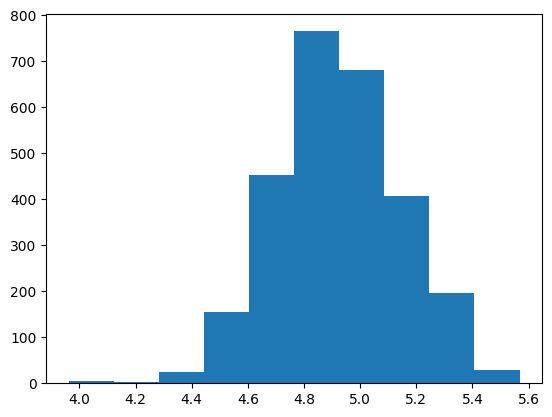

In [14]:
import matplotlib.pyplot as plt
plt.hist(income_bc)

In [15]:
lmbda

-0.16755992905921718

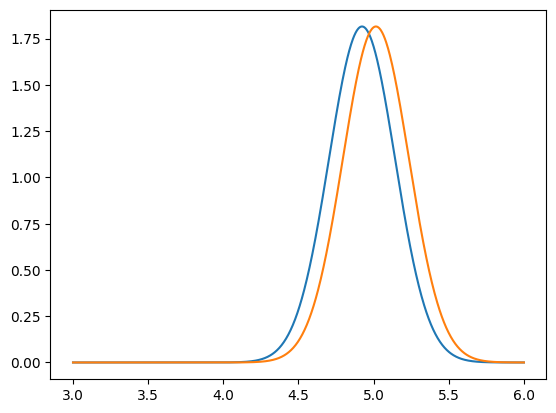

In [23]:
import numpy as np
x = np.linspace(3, 6, 1000)

params = st.norm.fit(income_bc)
mean = boxcox(df['Income'].iloc[0], lmbda=lmbda)
y1 = st.norm.pdf(x, *params)
y2 = st.norm.pdf(x, mean, params[1])
plt.plot(x,y1)
plt.plot(x,y2)

In [39]:
inv_boxcox(st.norm.rvs(mean, params[1], 1), lmbda)

array([28573.47050031])

In [47]:
hpi_shift = np.min(df['HPI']) + 1
df['HPI'] += hpi_shift


Alabama
Higher Education


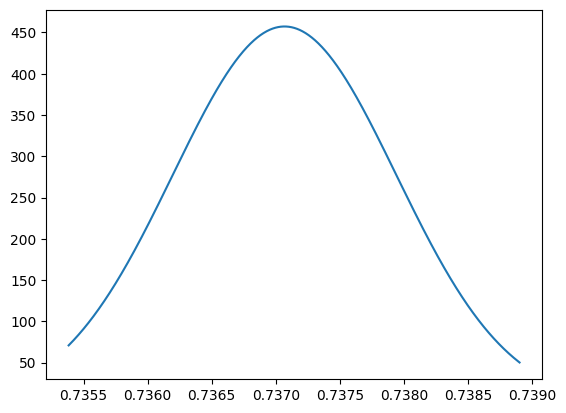

HPI


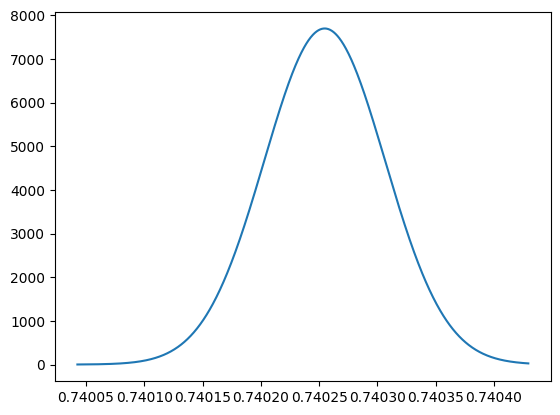

Income


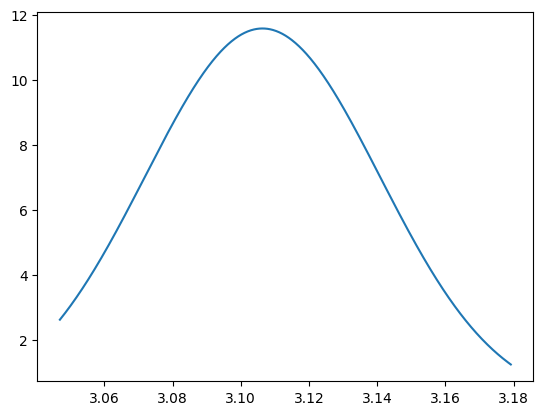

Unemployment


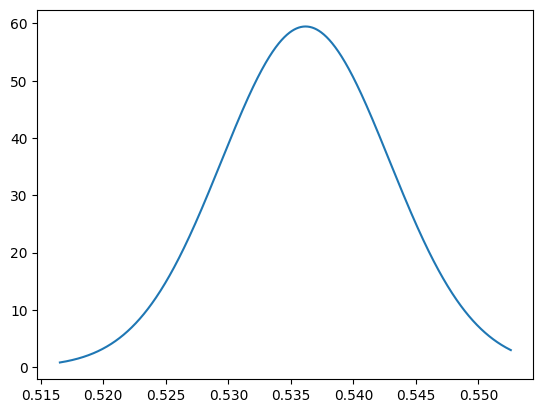

Poor physical health days


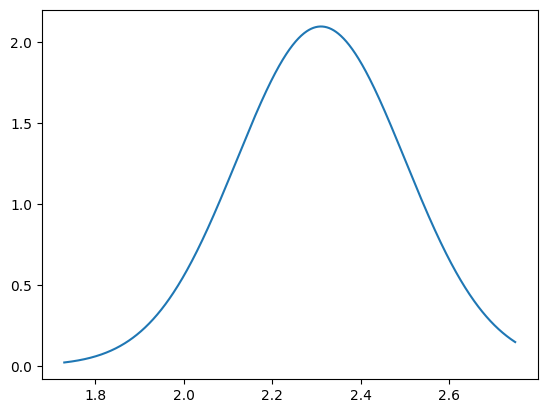

Poor mental health days


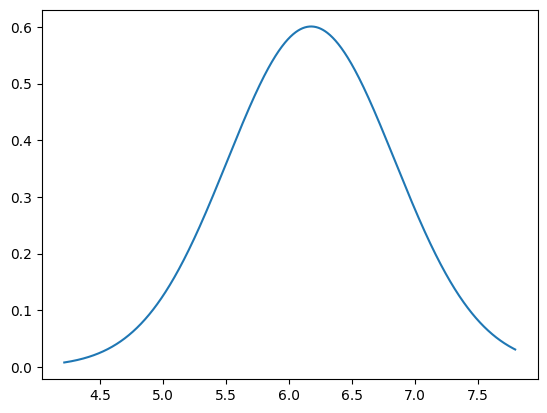

Violent crime


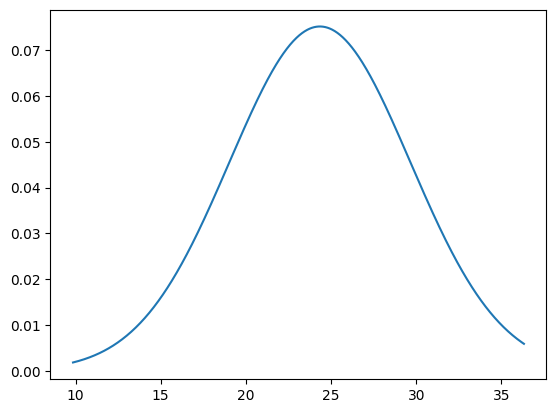

Severe housing problems


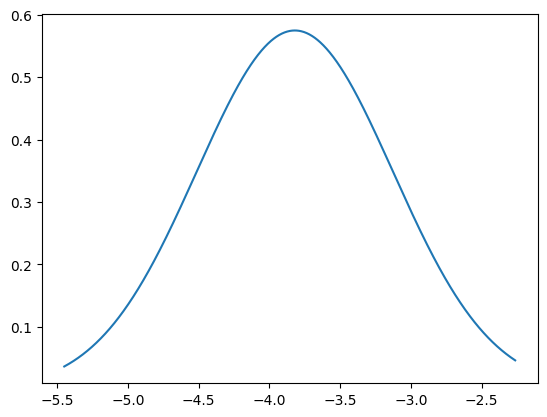

Income inequality


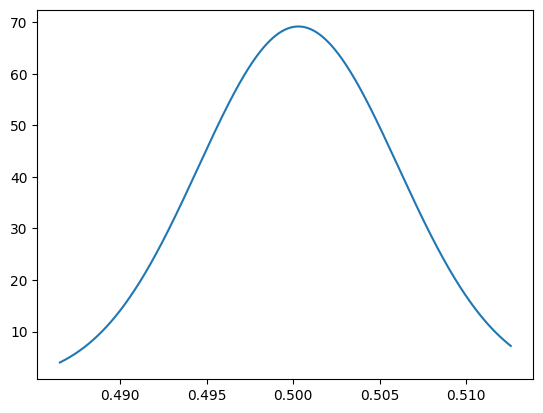

Access to exercise opportunities


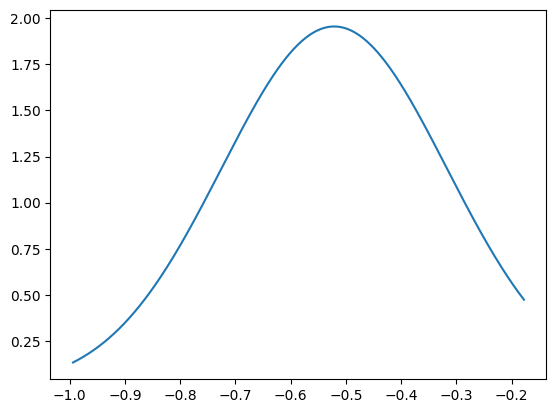

In [53]:
import numpy as np 
params_after_boxcox = dict()
for name, group in df.groupby('State'):
    print('\n' + name)
    params_after_boxcox[name] = dict()
    for i, col in enumerate(group.drop('State', axis=1).columns):
        print(col)
        col_bc, lmbda = boxcox(group[col].dropna())
        x = np.linspace(np.min(col_bc), np.max(col_bc), 1000)
        params = st.norm.fit(col_bc)
        params_after_boxcox[name][col] = {'lambda':lmbda, 'mean': params[0], 'std':params[1]}
        y1 = st.norm.pdf(x, *params)
        plt.plot(x,y1)
        plt.show()

    break

In [54]:
params_after_boxcox

{'Alabama': {'Higher Education': {'lambda': -1.3492766553884288,
   'mean': 0.7370682437858633,
   'std': 0.000872588126384895},
  'HPI': {'lambda': -1.3491573265229369,
   'mean': 0.7402548148120148,
   'std': 5.184157645205057e-05},
  'Income': {'lambda': -0.30960974283606735,
   'mean': 3.1063518281036426,
   'std': 0.03444391310250711},
  'Unemployment': {'lambda': -1.7947552775283393,
   'mean': 0.5361735454184192,
   'std': 0.006708878778245652},
  'Poor physical health days': {'lambda': 0.44798657217529064,
   'mean': 2.3101230707604707,
   'std': 0.19017395762592879},
  'Poor mental health days': {'lambda': 1.4851142266164783,
   'mean': 6.174826631709726,
   'std': 0.6639375068340057},
  'Violent crime': {'lambda': 0.4178763564123837,
   'mean': 24.34598782473716,
   'std': 5.3062342231622095},
  'Severe housing problems': {'lambda': -0.6472403543264721,
   'mean': -3.820599710280172,
   'std': 0.6940426495054334},
  'Income inequality': {'lambda': -1.9058285164561284,
   'mea